- Identify the data types you are working with.
- Examine the distributions of your data, numerically and/or visually.
- Identify outliers.
- Identify missing data and look for patterns of missing data.
- Describe how your EDA will inform your modeling decisions and process.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as datetime


## Import data

In [2]:
tickers = pd.read_csv('../dataset/tickers.csv')
#name the header ticker

In [3]:
tickers

0
0    ABIO
1    AGTC
2     AIM
3    AIRT
4    ALSK
..    ...
838  NIMU
839  FLXT
840  WDDD
841  VIDE
842  CIIT

[843 rows x 1 columns]

In [4]:
# tickers['ticker'].str.contains('WNEB').any()

### price_volume_sorted data

In [5]:
price_volume_sorted = pd.read_csv('../dataset/price_volume_sorted.csv',  parse_dates=['date'])
price_volume_sorted.head()

ticker       date   open  high    low  close   volume
0   AAME 2015-01-02  3.990  4.03  3.980   4.03  11443.0
1   AAME 2015-01-05  3.900  4.01  3.900   4.01  13727.0
2   AAME 2015-01-06  3.950  3.95  3.750   3.92   9743.0
3   AAME 2015-01-07  3.899  3.92  3.870   3.92   1486.0
4   AAME 2015-01-08  3.920  3.95  3.915   3.95   2200.0

- date - Date for which the price is given
- open - Price of the stock at market open (In USD)
- high - Highest price reached in the day
- low - Lowest price reached in the day
- close - Closing price for the day
- volume - Number of shares traded -Name` - the stock's ticker name
- dividends - how much dividends was given
- closeunadj - closing price without adjusting for stock split and other corporate actions such as dilution

In [6]:

#for each stock

#get the first date

#if it is more than 2015-01-02

    #then create entries from 


In [7]:
price_volume_sorted.describe()

open          high           low         close        volume
count  1.266085e+06  1.266085e+06  1.266085e+06  1.266085e+06  1.266085e+06
mean   3.946344e+04  4.078720e+04  3.769791e+04  1.057758e+01  1.733242e+05
std    3.071956e+06  3.165120e+06  2.955705e+06  1.690847e+01  1.817443e+06
min    2.000000e-03  2.000000e-03  2.000000e-03  1.000000e-03  0.000000e+00
25%    2.800000e+00  2.900000e+00  2.700000e+00  1.625000e+00  3.250000e+03
50%    7.927000e+00  8.100000e+00  7.720000e+00  5.350000e+00  1.935100e+04
75%    1.735000e+01  1.767000e+01  1.703200e+01  1.383000e+01  8.386000e+04
max    3.942536e+08  5.424295e+08  3.730857e+08  4.000000e+02  3.862281e+08

In [8]:
price_volume_sorted.isnull().sum()

ticker    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [9]:
price_volume_sorted.head()

ticker       date   open  high    low  close   volume
0   AAME 2015-01-02  3.990  4.03  3.980   4.03  11443.0
1   AAME 2015-01-05  3.900  4.01  3.900   4.01  13727.0
2   AAME 2015-01-06  3.950  3.95  3.750   3.92   9743.0
3   AAME 2015-01-07  3.899  3.92  3.870   3.92   1486.0
4   AAME 2015-01-08  3.920  3.95  3.915   3.95   2200.0

In [10]:
price_volume_sorted.tail()

ticker       date   open   high    low  close     volume
1266080   ZSAN 2020-12-14  0.661  0.673  0.630  0.648  3078592.0
1266081   ZSAN 2020-12-15  0.655  0.662  0.630  0.638  1594117.0
1266082   ZSAN 2020-12-16  0.633  0.645  0.598  0.607  1990734.0
1266083   ZSAN 2020-12-17  0.620  0.620  0.550  0.577  3141599.0
1266084   ZSAN 2020-12-18  0.575  0.610  0.575  0.583  2023953.0

In [11]:
price_volume_sorted.dtypes

ticker            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object

In [12]:
# check the number of business days for which the records as missing
rng = pd.date_range(start='2015-01-02', end='2020-12-18', freq='B')
rng[~rng.isin(price_volume_sorted.date.unique())]

DatetimeIndex(['2015-01-19', '2015-02-16', '2015-04-03', '2015-05-25',
               '2015-07-03', '2015-09-07', '2015-11-26', '2015-12-25',
               '2016-01-01', '2016-01-18', '2016-02-15', '2016-03-25',
               '2016-05-30', '2016-07-04', '2016-09-05', '2016-11-24',
               '2016-12-26', '2017-01-02', '2017-01-16', '2017-02-20',
               '2017-04-14', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15',
               '2018-02-19', '2018-03-30', '2018-05-28', '2018-07-04',
               '2018-09-03', '2018-11-22', '2018-12-05', '2018-12-25',
               '2019-01-01', '2019-01-21', '2019-02-18', '2019-04-19',
               '2019-05-27', '2019-07-04', '2019-09-02', '2019-11-28',
               '2019-12-25', '2020-01-01', '2020-01-20', '2020-02-17',
               '2020-04-10', '2020-05-25', '2020-07-03', '2020-09-07',
               '2020-11-26'],
              dtype='datetime64[ns]', freq=None

In [13]:
len(rng[~rng.isin(price_volume_sorted.date.unique())])

53

### There are about 53 days for which the stock price data is missing. This could lead to potential problems with the analysis.



In [14]:
price_volume_sorted.groupby('ticker').count().sort_values('date', ascending=False)['date']

ticker
AAME    1503
ONTX    1503
OEG     1503
OESX    1503
OFED    1503
        ... 
HTGM    1418
JCAP    1415
RKDA    1411
RMNI    1408
TMBR    1395
Name: date, Length: 843, dtype: int64

In [15]:
# don't really know what they are doing here
# gdf = df[df.Name == 'AABA']
# cdf = df[df.Name == 'CAT']

# cdf[~cdf.Date.isin(gdf.Date)]


### Let's check if all the listed companies have an entry on each date.



In [16]:
# Total number of companies
price_volume_sorted.ticker.unique().size

843

In [17]:
a = price_volume_sorted.groupby('date').ticker.unique().apply(len)


In [18]:
type(a)

pandas.core.series.Series

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(a)

date
2015-01-02    827
2015-01-05    827
2015-01-06    827
2015-01-07    827
2015-01-08    827
2015-01-09    827
2015-01-12    827
2015-01-13    827
2015-01-14    827
2015-01-15    827
2015-01-16    827
2015-01-20    827
2015-01-21    828
2015-01-22    828
2015-01-23    828
2015-01-26    828
2015-01-27    829
2015-01-28    829
2015-01-29    829
2015-01-30    831
2015-02-02    832
2015-02-03    832
2015-02-04    832
2015-02-05    832
2015-02-06    832
2015-02-09    832
2015-02-10    832
2015-02-11    832
2015-02-12    832
2015-02-13    834
2015-02-17    834
2015-02-18    835
2015-02-19    835
2015-02-20    835
2015-02-23    835
2015-02-24    835
2015-02-25    835
2015-02-26    835
2015-02-27    835
2015-03-02    835
2015-03-03    835
2015-03-04    835
2015-03-05    835
2015-03-06    835
2015-03-09    835
2015-03-10    835
2015-03-11    835
2015-03-12    835
2015-03-13    835
2015-03-16    835
2015-03-17    835
2015-03-18    835
2015-03-19    835
2015-03-20    835
2015-03-23    835
2015-

### This confirms that some companies do not have a stock price entry on each day.

## Basic EDA and Feature Engineering

### Price
- Since we have four values of stock price for each day, let's create a feature called Price which is the average of all these values.

In [20]:
df = price_volume_sorted
#store it as df

In [21]:
values = (df['high'] + df['low'] + df['open'] + df['close'])/4
df = df.assign(Price=values)

In [22]:
df.head()


ticker       date   open  high    low  close   volume    Price
0   AAME 2015-01-02  3.990  4.03  3.980   4.03  11443.0  4.00750
1   AAME 2015-01-05  3.900  4.01  3.900   4.01  13727.0  3.95500
2   AAME 2015-01-06  3.950  3.95  3.750   3.92   9743.0  3.89250
3   AAME 2015-01-07  3.899  3.92  3.870   3.92   1486.0  3.90225
4   AAME 2015-01-08  3.920  3.95  3.915   3.95   2200.0  3.93375

In [23]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

open             high              low          close  \
count    1266085.00000    1266085.00000    1266085.00000  1266085.00000   
mean       39463.43960      40787.20141      37697.91187       10.57758   
std      3071955.66230    3165119.73307    2955704.87411       16.90847   
min            0.00200          0.00200          0.00200        0.00100   
25%            2.80000          2.90000          2.70000        1.62500   
50%            7.92700          8.10000          7.72000        5.35000   
75%           17.35000         17.67000         17.03200       13.83000   
max    394253645.18000  542429511.82500  373085664.23100      400.00000   

                volume            Price  
count    1266085.00000    1266085.00000  
mean      173324.16306      29489.78261  
std      1817443.22411    2296627.96282  
min            0.00000          0.00200  
25%         3250.00000          2.73375  
50%        19351.00000          7.66775  
75%        83860.00000         16.98000  
max    386228083.00000  291059738.41250

In [24]:
np.percentile(df['Price'] , 47)

6.8999999999999995

Comments:
- 75% of the stocks have a price of under 15 USD, indicating that this segment of the stock market is mostly dominated by companies with low stock price.
- 25% of the stocks have a price of under 1.53 USD, which is below the price at which some academics would consider to be penny stocks (i.e. stocks less than 5 USD)
- roughly 47% of stocks in this universe would be considered as penny stocks as they are 5 USD or less


In [25]:
df.head()


ticker       date   open  high    low  close   volume    Price
0   AAME 2015-01-02  3.990  4.03  3.980   4.03  11443.0  4.00750
1   AAME 2015-01-05  3.900  4.01  3.900   4.01  13727.0  3.95500
2   AAME 2015-01-06  3.950  3.95  3.750   3.92   9743.0  3.89250
3   AAME 2015-01-07  3.899  3.92  3.870   3.92   1486.0  3.90225
4   AAME 2015-01-08  3.920  3.95  3.915   3.95   2200.0  3.93375

In [26]:
len(df.ticker.unique())

843

In [27]:
tickers.head(10)

0
0  ABIO
1  AGTC
2   AIM
3  AIRT
4  ALSK
5   ALT
6  BEAT
7  CASI
8  CBAT
9  CDZI

### Growth

In [28]:
stock_names = df.ticker.unique()
stock_names

array(['AAME', 'ABCP', 'ABEO', 'ABIO', 'ABMC', 'ACER', 'ACFN', 'ACHV',
       'ACNB', 'ACRX', 'ACU', 'ACUR', 'ACY', 'ADMA', 'ADMP', 'ADMT', 'AE',
       'AEHR', 'AERI', 'AEY', 'AGRX', 'AGTC', 'AGYS', 'AHH', 'AHPI',
       'AIKI', 'AIM', 'AINC', 'AIRT', 'AJX', 'AKBA', 'ALDX', 'ALIM',
       'ALOT', 'ALSK', 'ALT', 'AMNB', 'AMOT', 'AMPE', 'AMRB', 'AMRK',
       'AMSC', 'AMSWA', 'AMTX', 'AMTY', 'ANDR', 'ANFC', 'AOSL', 'AP',
       'APDN', 'APEX', 'APT', 'APTS', 'APYX', 'ARDX', 'ARL', 'ARTW',
       'ASMB', 'ASPN', 'ASPU', 'ASRV', 'ASTC', 'ASUR', 'ASYS', 'ATHX',
       'ATLC', 'ATLO', 'ATNM', 'ATRS', 'AUBN', 'AUMN', 'AUPH', 'AUTO',
       'AVEO', 'AVNW', 'AWH', 'AWRE', 'AWX', 'AXGN', 'AXR', 'AXTI',
       'BABB', 'BBGI', 'BBI', 'BBQ', 'BBW', 'BCBP', 'BCLI', 'BCOV',
       'BDGE', 'BDR', 'BEAT', 'BELFA', 'BFGC', 'BFIN', 'BGSF', 'BICX',
       'BIOC', 'BIOL', 'BKEP', 'BKGM', 'BKSC', 'BKTI', 'BLBD', 'BLFS',
       'BLPH', 'BMRC', 'BNET', 'BOOM', 'BOTJ', 'BPTH', 'BRG', 'BRN',
       'BSQR', 'BS

In [29]:
df.head()

ticker       date   open  high    low  close   volume    Price
0   AAME 2015-01-02  3.990  4.03  3.980   4.03  11443.0  4.00750
1   AAME 2015-01-05  3.900  4.01  3.900   4.01  13727.0  3.95500
2   AAME 2015-01-06  3.950  3.95  3.750   3.92   9743.0  3.89250
3   AAME 2015-01-07  3.899  3.92  3.870   3.92   1486.0  3.90225
4   AAME 2015-01-08  3.920  3.95  3.915   3.95   2200.0  3.93375

In [30]:
dates = df.groupby('ticker').agg({'date': [np.min, np.max]})
dates

date           
             amin       amax
ticker                      
AAME   2015-01-02 2020-12-18
ABCP   2015-01-02 2020-12-18
ABEO   2015-01-02 2020-12-18
ABIO   2015-01-02 2020-12-18
ABMC   2015-01-02 2020-12-18
...           ...        ...
ZEUS   2015-01-02 2020-12-18
ZGNX   2015-01-02 2020-12-18
ZIVO   2015-01-02 2020-12-18
ZNOG   2015-01-02 2020-12-18
ZSAN   2015-01-27 2020-12-18

[843 rows x 2 columns]

In [31]:
dates.columns = dates.columns.droplevel(0)
dates

amin       amax
ticker                      
AAME   2015-01-02 2020-12-18
ABCP   2015-01-02 2020-12-18
ABEO   2015-01-02 2020-12-18
ABIO   2015-01-02 2020-12-18
ABMC   2015-01-02 2020-12-18
...           ...        ...
ZEUS   2015-01-02 2020-12-18
ZGNX   2015-01-02 2020-12-18
ZIVO   2015-01-02 2020-12-18
ZNOG   2015-01-02 2020-12-18
ZSAN   2015-01-27 2020-12-18

[843 rows x 2 columns]

In [32]:
dates['amin']

ticker
AAME   2015-01-02
ABCP   2015-01-02
ABEO   2015-01-02
ABIO   2015-01-02
ABMC   2015-01-02
          ...    
ZEUS   2015-01-02
ZGNX   2015-01-02
ZIVO   2015-01-02
ZNOG   2015-01-02
ZSAN   2015-01-27
Name: amin, Length: 843, dtype: datetime64[ns]

In [33]:
df.groupby('ticker').first().Price


ticker
AAME      4.00750
ABCP      1.66250
ABEO      3.34250
ABIO     94.57100
ABMC      0.13000
          ...    
ZEUS     18.03500
ZGNX      8.75525
ZIVO      0.08500
ZNOG      1.39250
ZSAN    180.50250
Name: Price, Length: 843, dtype: float64

In [34]:
price_mapping = {name : price for name, price in zip(stock_names, df.groupby('ticker').first().Price)}
price_mapping

{'AAME': 4.0075,
 'ABCP': 1.6625,
 'ABEO': 3.3425,
 'ABIO': 94.57100000000001,
 'ABMC': 0.13,
 'ACER': 47.70075,
 'ACFN': 0.755,
 'ACHV': 3790.1345,
 'ACNB': 21.2625,
 'ACRX': 6.7749999999999995,
 'ACU': 20.0425,
 'ACUR': 1.92525,
 'ACY': 8.52275,
 'ADMA': 11.350000000000001,
 'ADMP': 6.0975,
 'ADMT': 0.24,
 'AE': 49.129999999999995,
 'AEHR': 2.69,
 'AERI': 30.3175,
 'AEY': 2.3875,
 'AGRX': 6.2425,
 'AGTC': 21.2025,
 'AGYS': 12.4305,
 'AHH': 9.5075,
 'AHPI': 3.0825,
 'AIKI': 65.47774999999999,
 'AIM': 96.58024999999999,
 'AINC': 94.86,
 'AIRT': 19.234250000000003,
 'AJX': 14.125,
 'AKBA': 11.5,
 'ALDX': 7.375000000000001,
 'ALIM': 64.565,
 'ALOT': 16.15,
 'ALSK': 1.79,
 'ALT': 406.51825,
 'AMNB': 24.252499999999998,
 'AMOT': 23.3975,
 'AMPE': 3.6325000000000003,
 'AMRB': 9.5725,
 'AMRK': 9.8975,
 'AMSC': 5.9719999999999995,
 'AMSWA': 9.052499999999998,
 'AMTX': 5.74,
 'AMTY': 0.04,
 'ANDR': 0.07500000000000001,
 'ANFC': 52.560750000000006,
 'AOSL': 8.872499999999999,
 'AP': 19.22999999

In [35]:
base_mapping = np.array(list(map(lambda x : price_mapping[x], df['ticker'].values)))

In [36]:
base_mapping

array([  4.0075,   4.0075,   4.0075, ..., 180.5025, 180.5025, 180.5025])

In [37]:
df['Growth'] = df['Price'] / base_mapping - 1

In [38]:
df.head()

ticker       date   open  high    low  close   volume    Price    Growth
0   AAME 2015-01-02  3.990  4.03  3.980   4.03  11443.0  4.00750  0.000000
1   AAME 2015-01-05  3.900  4.01  3.900   4.01  13727.0  3.95500 -0.013100
2   AAME 2015-01-06  3.950  3.95  3.750   3.92   9743.0  3.89250 -0.028696
3   AAME 2015-01-07  3.899  3.92  3.870   3.92   1486.0  3.90225 -0.026263
4   AAME 2015-01-08  3.920  3.95  3.915   3.95   2200.0  3.93375 -0.018403

In [39]:
df.tail()

ticker       date   open   high    low  close     volume    Price  \
1266080   ZSAN 2020-12-14  0.661  0.673  0.630  0.648  3078592.0  0.65300   
1266081   ZSAN 2020-12-15  0.655  0.662  0.630  0.638  1594117.0  0.64625   
1266082   ZSAN 2020-12-16  0.633  0.645  0.598  0.607  1990734.0  0.62075   
1266083   ZSAN 2020-12-17  0.620  0.620  0.550  0.577  3141599.0  0.59175   
1266084   ZSAN 2020-12-18  0.575  0.610  0.575  0.583  2023953.0  0.58575   

           Growth  
1266080 -0.996382  
1266081 -0.996420  
1266082 -0.996561  
1266083 -0.996722  
1266084 -0.996755

In [40]:
# look at the basic statistics and supress the scientific notations
df.Growth.describe().apply(lambda x: format(x, 'f'))



count    1266085.000000
mean           0.097431
std            1.443348
min           -1.000000
25%           -0.500729
50%           -0.077329
75%            0.304094
max           73.239583
Name: Growth, dtype: object

The worst performing company had a decline of 100% in their shares compared to their first ever opening price and the best company had a 997% increase in their share price. 

# Time Series Analysis

In [41]:

# Let's find out the top 5 best and worst performing stocks!

sample_dates = pd.date_range(start='2015-01-02', end='2020-12-18', freq='B')


In [42]:
year_end_dates = sample_dates[sample_dates.is_year_end]
year_end_dates


DatetimeIndex(['2015-12-31', '2016-12-30', '2017-12-29', '2018-12-31',
               '2019-12-31'],
              dtype='datetime64[ns]', freq=None)

In [43]:
#save the worst stocks into a dataframe
worst_stocks = df[df.date == df.date.max()].sort_values('Growth').head(5)
worst_stocks

ticker       date   open   high    low  close     volume    Price  \
989720    RSLS 2020-12-18  3.550  3.550  3.550  3.550      292.0  3.55000   
226811     CEI 2020-12-18  0.900  0.916  0.865  0.865  1788273.0  0.88650   
794665    NSPR 2020-12-18  0.354  0.354  0.325  0.330   807885.0  0.34075   
1124970   TGHI 2020-12-18  0.015  0.015  0.013  0.015  1097501.0  0.01450   
1141395   TNXP 2020-12-18  0.610  0.635  0.594  0.594  9151633.0  0.60825   

           Growth  
989720  -1.000000  
226811  -1.000000  
794665  -0.999999  
1124970 -0.999939  
1141395 -0.999862

In [44]:
#save the names of the wrost stocks as an array
ws = worst_stocks.ticker.values
ws

array(['RSLS', 'CEI', 'NSPR', 'TGHI', 'TNXP'], dtype=object)

In [45]:
#save the best stocks into a dataframe

best_stocks = df[df.date == df.date.max()].sort_values('Growth', ascending=False).head(5)
best_stocks

ticker       date     open     high      low    close     volume  \
453764   FIVN 2020-12-18  177.890  177.890  171.690  176.600   822605.0   
157785   BLFS 2020-12-18   44.040   45.530   43.330   43.460  1120580.0   
596433    INS 2020-12-18   41.210   41.400   39.490   39.490    60905.0   
141252   BFGC 2020-12-18    0.233    0.235    0.225    0.232   154056.0   
874207   PAYS 2020-12-18    5.320    5.340    5.090    5.160   389526.0   

            Price     Growth  
453764  176.01750  38.483513  
157785   44.09000  25.369617  
596433   40.39750  23.197364  
141252    0.23125  22.125000  
874207    5.22750  20.781250

In [46]:
#save the names of the best stocks as an array

bs = best_stocks.ticker.values
bs

array(['FIVN', 'BLFS', 'INS', 'BFGC', 'PAYS'], dtype=object)

In [47]:
#make another copy of df and set the date as index
tdf = df.copy()
tdf = df.set_index('date')
tdf

ticker   open   high    low  close     volume    Price    Growth
date                                                                       
2015-01-02   AAME  3.990  4.030  3.980  4.030    11443.0  4.00750  0.000000
2015-01-05   AAME  3.900  4.010  3.900  4.010    13727.0  3.95500 -0.013100
2015-01-06   AAME  3.950  3.950  3.750  3.920     9743.0  3.89250 -0.028696
2015-01-07   AAME  3.899  3.920  3.870  3.920     1486.0  3.90225 -0.026263
2015-01-08   AAME  3.920  3.950  3.915  3.950     2200.0  3.93375 -0.018403
...           ...    ...    ...    ...    ...        ...      ...       ...
2020-12-14   ZSAN  0.661  0.673  0.630  0.648  3078592.0  0.65300 -0.996382
2020-12-15   ZSAN  0.655  0.662  0.630  0.638  1594117.0  0.64625 -0.996420
2020-12-16   ZSAN  0.633  0.645  0.598  0.607  1990734.0  0.62075 -0.996561
2020-12-17   ZSAN  0.620  0.620  0.550  0.577  3141599.0  0.59175 -0.996722
2020-12-18   ZSAN  0.575  0.610  0.575  0.583  2023953.0  0.58575 -0.996755

[1266085 rows x 8 columns]

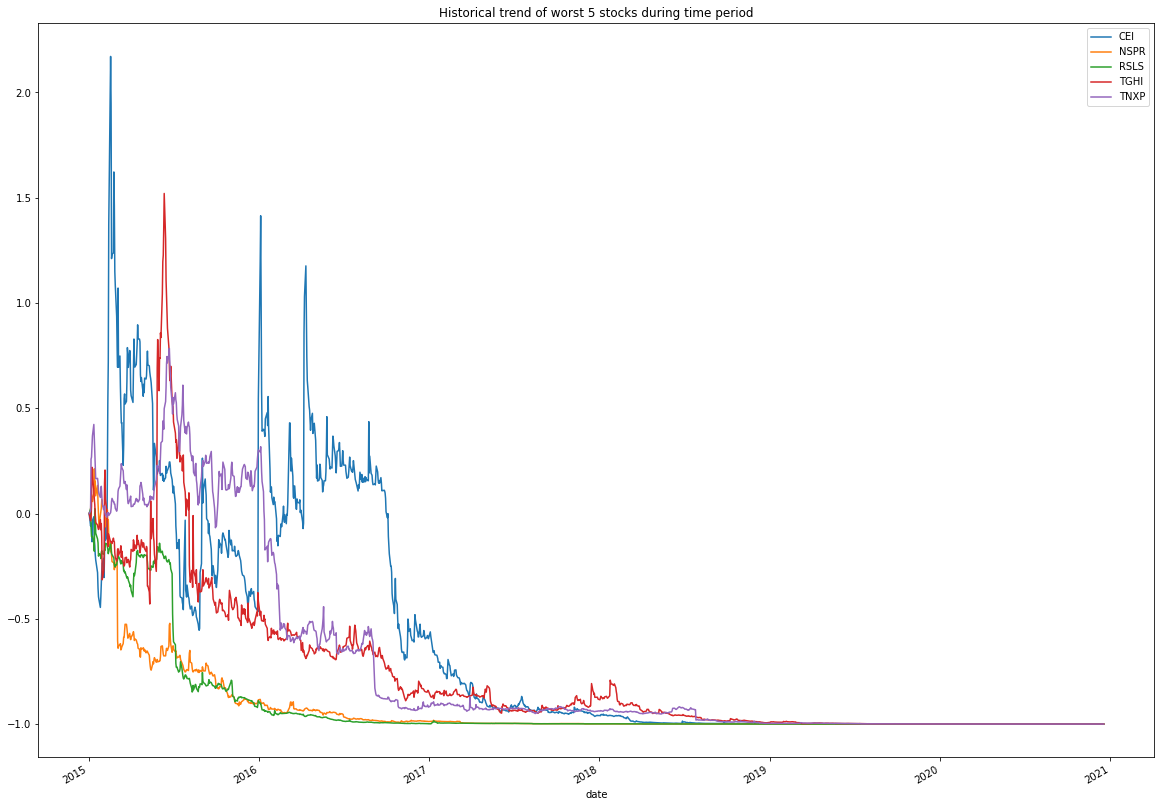

In [48]:
#plot the 5 worst stocks
plt.rcParams["figure.figsize"] = (20,15)

tdf[tdf.ticker.isin(ws)].groupby('ticker').Growth.plot(title='Historical trend of worst 5 stocks during time period', legend=True)
plt.show()

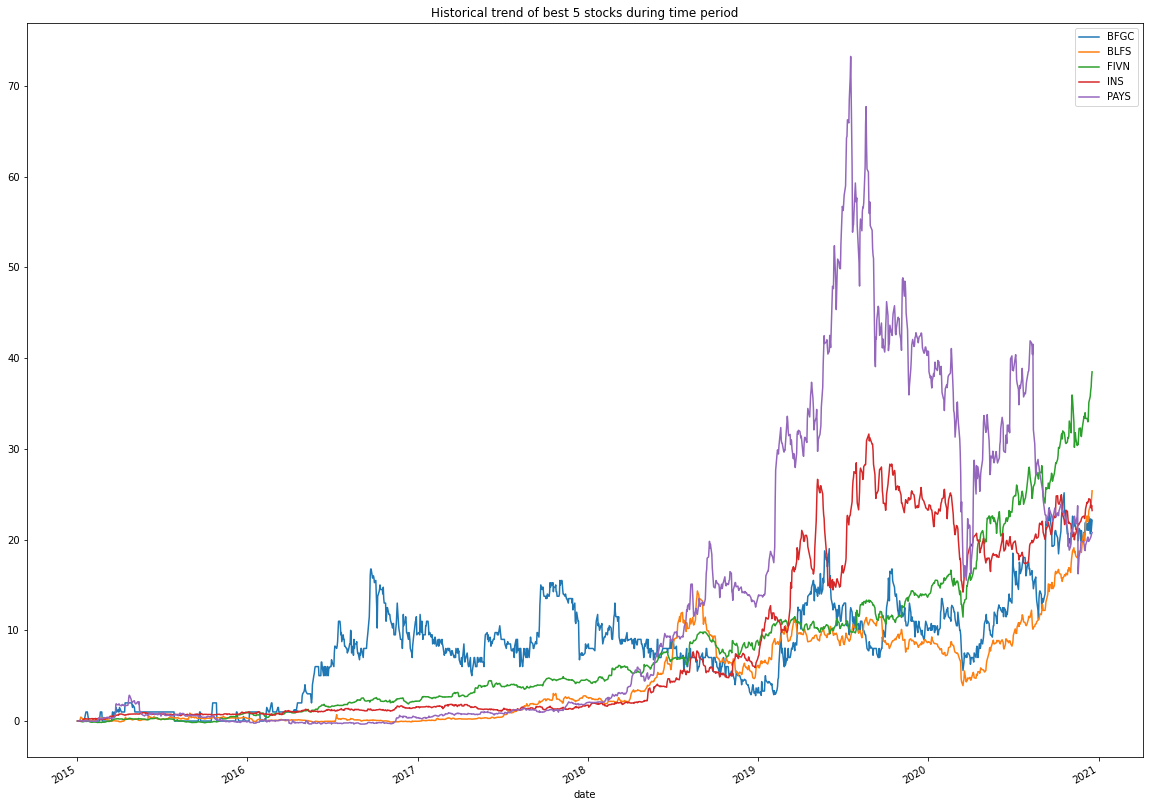

In [49]:
#plot the 5 best stocks

plt.rcParams["figure.figsize"] = (20,15)

tdf[tdf.ticker.isin(bs)].groupby('ticker').Growth.plot(title='Historical trend of best 5 stocks during time period', legend=True)
plt.show()

# Correlation Analysis

<AxesSubplot:xlabel='ticker', ylabel='ticker'>

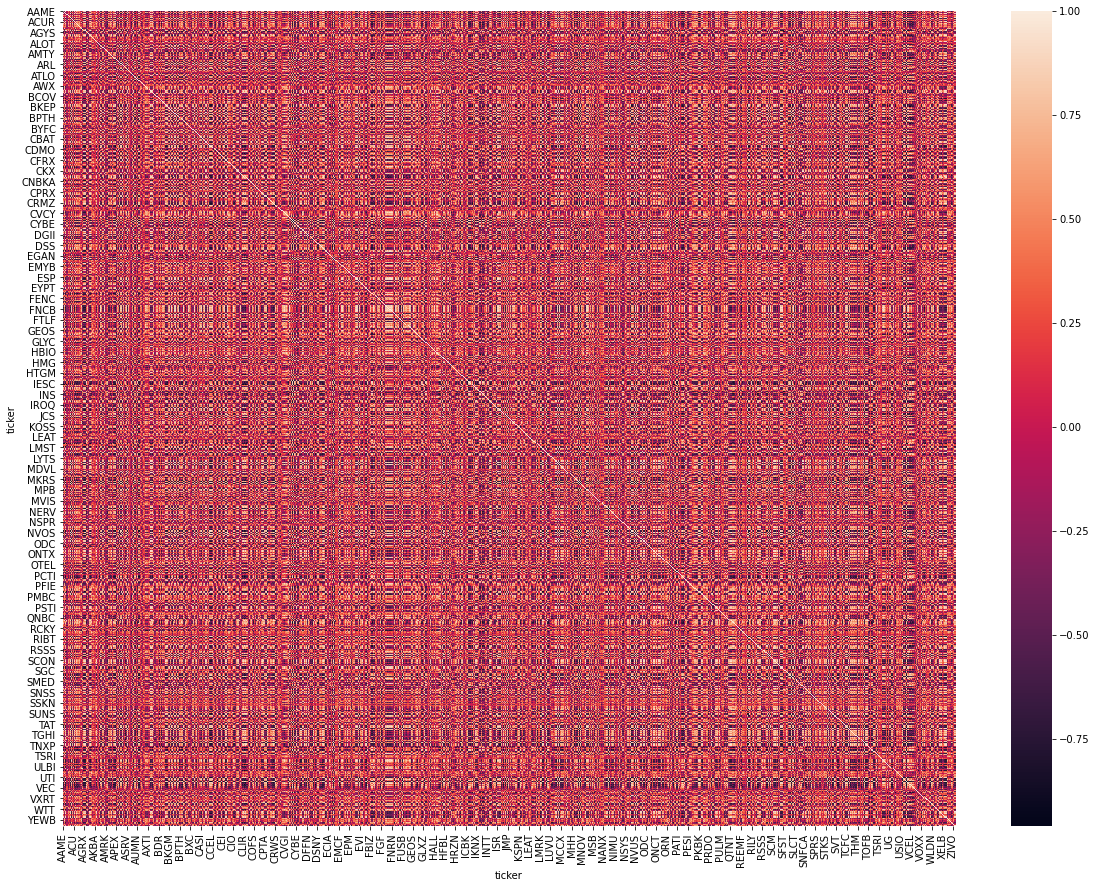

In [50]:
corr = df.pivot('date', 'ticker', 'Growth').corr()
sns.heatmap(corr)



In [51]:
def unique_corelations(indices):
    mapping = {}
    for record in indices:
        (stock_a, stock_b) = record
        value_list = mapping.get(stock_a)
        if value_list:
            if stock_b not in value_list:
                value_list.append(stock_b)
                mapping.update({stock_a: value_list})
        else:
            mapping.update({stock_a: [stock_b]})

    return mapping

def filter_corelations_positive(corr, threshold):
    indices = np.where(corr > threshold)
    indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
    mapping = unique_corelations(indices)
    return mapping
    
def filter_corelations_negative(corr, threshold):
    indices = np.where(corr < threshold)
    indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
    mapping = unique_corelations(indices)
    return mapping

In [52]:
#filter correlation with threshold more than 0.9
positive_cor_strong = filter_corelations_positive(corr, threshold=0.9)


In [53]:
a = len(positive_cor_strong.keys())
len(positive_cor_strong.keys())

332

In [54]:
#filter correlation with threshold more than 0.5
positive_cor_weak = filter_corelations_positive(corr, threshold=0.5)
b = len(positive_cor_weak.keys())
len(positive_cor_weak.keys())

831

In [55]:
#filter correlation with threshold less than -0.9
negative_cor_strong = filter_corelations_negative(corr, threshold=-0.9)

In [56]:
c = len(negative_cor_strong.keys())
len(negative_cor_strong.keys())

48

In [57]:
#filter correlation with threshold less than -0.5
negative_cor_weak = filter_corelations_negative(corr, threshold=-0.5)
d = len(negative_cor_weak.keys())
len(negative_cor_weak.keys())

784

<AxesSubplot:>

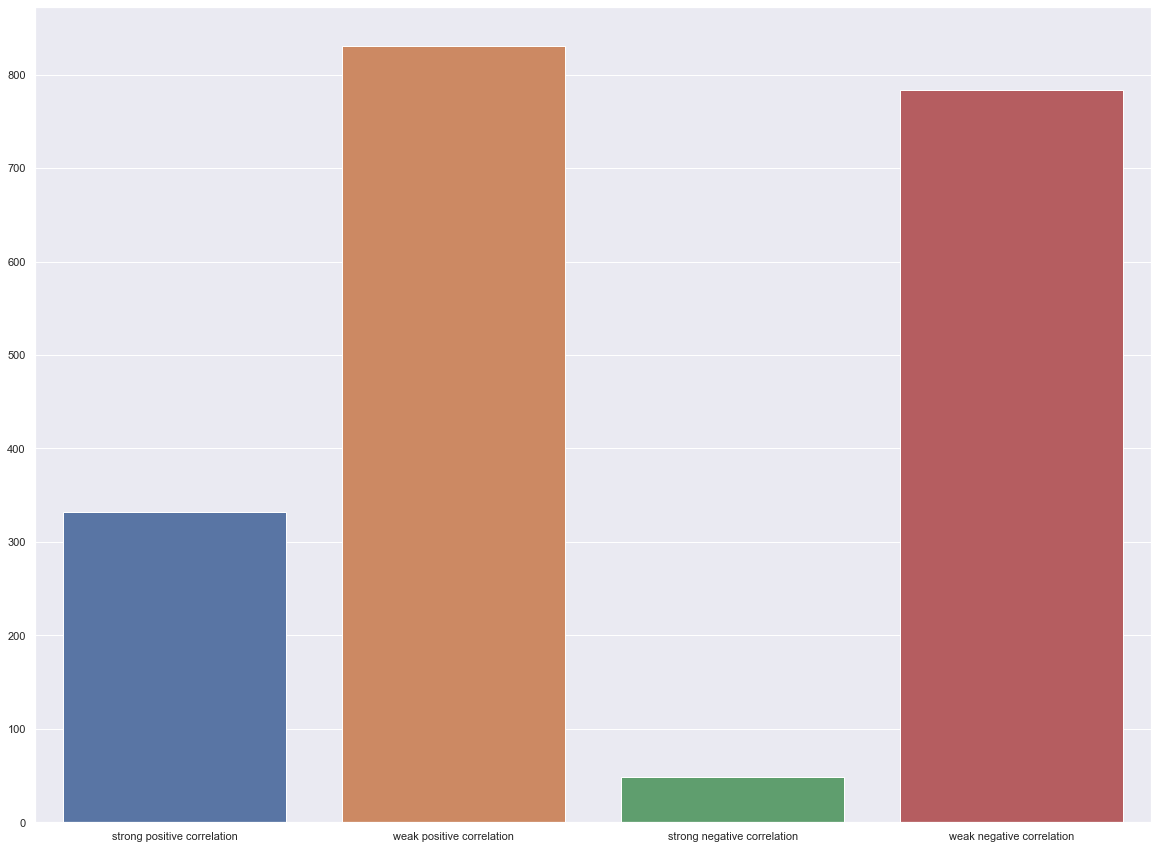

In [58]:
sns.set()
sns.barplot(x=['strong positive correlation','weak positive correlation','strong negative correlation','weak negative correlation'],y=[a,b,c,d])

From the above results, we can note the following:-

- There is a Strong Positive corelation in the stock growth of around 1379 stocks out of 1948 stocks, though some could be due to collinearity. This is most likely due to the fact that microcap stocks as an asset class is highly sensitive to liquidity flight which occurs during periods of high market stress as investors unload stocks that are deemed as more risky in search of large cap stocks that can provide ample liquidity. this is also known as Flight-to-Safety
- There is a Strong Negative corelation in the stock growth of around 1946 stocks, this could be because there are many micro cap stocks that have contrasting busniess models. for example, One would expect that sustained high fuel costs would generally depress the profits of airlines, and thus their stocks' values.


# Fundamentals Data EDA

In [59]:
#read in fundamentals_filtered data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
fundamentals_filtered = pd.read_csv('../dataset/fundamentals_filtered.csv', parse_dates= ['datekey'])


In [60]:
#set df as the variable
df = fundamentals_filtered

In [61]:
df.tail()

datekey ticker dimension calendardate reportperiod lastupdated  \
19384 2016-05-12   AAME       ARQ   2016-03-31   2016-03-31  2020-11-11   
19385 2016-03-29   AAME       ARQ   2015-12-31   2015-12-31  2020-11-11   
19386 2015-11-10   AAME       ARQ   2015-09-30   2015-09-30  2020-11-11   
19387 2015-08-12   AAME       ARQ   2015-06-30   2015-06-30  2020-11-11   
19388 2015-05-13   AAME       ARQ   2015-03-31   2015-03-31  2020-11-11   

           accoci       assets  assetsavg  assetsc  assetsnc  assetturnover  \
19384   5561000.0  300133000.0        NaN      NaN       NaN            NaN   
19385   4584000.0  314603000.0        NaN      NaN       NaN            NaN   
19386   4807000.0  317203000.0        NaN      NaN       NaN            NaN   
19387   7235000.0  327225000.0        NaN      NaN       NaN            NaN   
19388  12379000.0  313185000.0        NaN      NaN       NaN            NaN   

        bvps     capex     cashneq  cashnequsd         cor  consolinc  \
19384  5.085 -226000.0  10784000.0  10784000.0  24825000.0   898000.0   
19385  5.026 -125000.0  15622000.0  15622000.0  25103000.0   114000.0   
19386  5.023  -22000.0  14637000.0  14637000.0  24637000.0   238000.0   
19387  5.125 -108000.0  32927000.0  32927000.0  26383000.0  3345000.0   
19388  5.223  -67000.0  19695000.0  19695000.0  25241000.0   691000.0   

       currentratio     de        debt  debtc  debtnc     debtusd  \
19384           NaN  1.891  33738000.0    NaN     NaN  33738000.0   
19385           NaN  2.070  33738000.0    NaN     NaN  33738000.0   
19386           NaN  2.073  33738000.0    NaN     NaN  33738000.0   
19387           NaN  2.100  33738000.0    NaN     NaN  33738000.0   
19388           NaN  1.915  33738000.0    NaN     NaN  33738000.0   

       deferredrev   depamor  deposits  divyield   dps       ebit     ebitda  \
19384          0.0  291000.0       0.0     0.005  0.02  1749000.0  2040000.0   
19385          0.0  283000.0       0.0     0.005  0.00   509000.0   792000.0   
19386          0.0  267000.0       0.0     0.008  0.00   726000.0   993000.0   
19387          0.0  284000.0       0.0     0.011  0.00  4543000.0  4827000.0   
19388          0.0  283000.0       0.0     0.011  0.02  1359000.0  1642000.0   

       ebitdamargin  ebitdausd    ebitusd        ebt   eps  epsdil  epsusd  \
19384         0.049  2040000.0  1749000.0  1376000.0  0.04    0.04    0.04   
19385         0.020   792000.0   509000.0   144000.0  0.00    0.00    0.00   
19386         0.025   993000.0   726000.0   365000.0  0.01    0.01    0.01   
19387         0.108  4827000.0  4543000.0  4189000.0  0.16    0.15    0.16   
19388         0.040  1642000.0  1359000.0  1010000.0  0.03    0.03    0.03   

            equity  equityavg    equityusd           ev  evebit  evebitda  \
19384  103824000.0        NaN  103824000.0  103702857.0    14.0    11.986   
19385  102492000.0        NaN  102492000.0  102547189.0    14.0    12.424   
19386  103212000.0        NaN  103212000.0  119988881.0    14.0    12.747   
19387  105542000.0        NaN  105542000.0   75768392.0     8.0     7.117   
19388  107457000.0        NaN  107457000.0   92015943.0    14.0    12.351   

             fcf  fcfps  fxusd          gp  grossmargin  intangibles  \
19384 -7183000.0 -0.352    1.0  16922000.0        0.405    2544000.0   
19385  3451000.0  0.169    1.0  14754000.0        0.370    2544000.0   
19386   530000.0  0.026    1.0  15722000.0        0.390    2544000.0   
19387  2214000.0  0.108    1.0  18389000.0        0.411    2544000.0   
19388 -4308000.0 -0.209    1.0  15708000.0        0.384    2544000.0   

         intexp       invcap  invcapavg  inventory  investments  investmentsc  \
19384  373000.0  320543000.0        NaN        0.0  236027000.0           NaN   
19385  365000.0  330175000.0        NaN        0.0  238385000.0           NaN   
19386  361000.0  333760000.0        NaN        0.0  237627000.0           NaN   
19387  354000.0  325492000.0        NaN        0.0  2267520

In [62]:
mask = (df['datekey'] > '2020-10-1') & (df['datekey'] <= '2020-12-31')
#create a mask that takes into account the final quarter of the year

In [63]:
final_quarter = (df.loc[mask])


In [64]:
len(df['ticker'].unique())

843

In [65]:
len(final_quarter['ticker'])
#some stocks did not report their final quarter results yet when i got the data

851

In [66]:
df.loc[df['ticker'] == 'AAME']

datekey ticker dimension calendardate reportperiod lastupdated  \
19366 2020-11-10   AAME       ARQ   2020-09-30   2020-09-30  2020-11-11   
19367 2020-08-11   AAME       ARQ   2020-06-30   2020-06-30  2020-11-11   
19368 2020-05-11   AAME       ARQ   2020-03-31   2020-03-31  2020-11-11   
19369 2020-03-24   AAME       ARQ   2019-12-31   2019-12-31  2020-11-11   
19370 2019-11-12   AAME       ARQ   2019-09-30   2019-09-30  2020-11-11   
19371 2019-08-13   AAME       ARQ   2019-06-30   2019-06-30  2020-11-11   
19372 2019-05-13   AAME       ARQ   2019-03-31   2019-03-31  2020-11-11   
19373 2019-04-01   AAME       ARQ   2018-12-31   2018-12-31  2020-11-11   
19374 2018-11-13   AAME       ARQ   2018-09-30   2018-09-30  2020-11-11   
19375 2018-08-14   AAME       ARQ   2018-06-30   2018-06-30  2020-11-11   
19376 2018-05-11   AAME       ARQ   2018-03-31   2018-03-31  2020-11-11   
19377 2018-03-26   AAME       ARQ   2017-12-31   2017-12-31  2020-11-11   
19378 2017-11-14   AAME       ARQ   2017-09-30   2017-09-30  2020-11-11   
19379 2017-08-14   AAME       ARQ   2017-06-30   2017-06-30  2020-11-11   
19380 2017-05-12   AAME       ARQ   2017-03-31   2017-03-31  2020-11-11   
19381 2017-03-24   AAME       ARQ   2016-12-31   2016-12-31  2020-11-11   
19382 2016-11-14   AAME       ARQ   2016-09-30   2016-09-30  2020-11-11   
19383 2016-08-12   AAME       ARQ   2016-06-30   2016-06-30  2020-11-11   
19384 2016-05-12   AAME       ARQ   2016-03-31   2016-03-31  2020-11-11   
19385 2016-03-29   AAME       ARQ   2015-12-31   2015-12-31  2020-11-11   
19386 2015-11-10   AAME       ARQ   2015-09-30   2015-09-30  2020-11-11   
19387 2015-08-12   AAME       ARQ   2015-06-30   2015-06-30  2020-11-11   
19388 2015-05-13   AAME       ARQ   2015-03-31   2015-03-31  2020-11-11   

           accoci       assets  assetsavg  assetsc  assetsnc  assetturnover  \
19366  19772000.0  384952000.0        NaN      NaN       NaN            NaN   
19367  17464000.0  385737000.0        NaN      NaN       NaN            NaN   
19368   1667000.0  347861000.0        NaN      NaN       NaN            NaN   
19369  10459000.0  377626000.0        NaN      NaN       NaN            NaN   
19370   9791000.0  383335000.0        NaN      NaN       NaN            NaN   
19371   4727000.0  371730000.0        NaN      NaN       NaN            NaN   
19372  -1082000.0  354244000.0        NaN      NaN       NaN            NaN   
19373  -7535000.0  344274000.0        NaN      NaN       NaN            NaN   
19374  -6762000.0  339549000.0        NaN      NaN       NaN            NaN   
19375  -6429000.0  341655000.0        NaN      NaN       NaN            NaN   
19376  -3618000.0  325810000.0        NaN      NaN       NaN            NaN   
19377   9751000.0  343239000.0        NaN      NaN       NaN            NaN   
19378   8725000.0  334305000.0        NaN      NaN       NaN            NaN   
19379   7221000.0  332741000.0        NaN      NaN       NaN            NaN   
19380   8014000.0  312914000.0        NaN      NaN       NaN            NaN   
19381   5830000.0  318600000.0        NaN      NaN       NaN            NaN   
19382  10527000.0  321503000.0        NaN      NaN       NaN            NaN   
19383   9672000.0  320265000.0        NaN      NaN       NaN            NaN   
19384   5561000.0  300133000.0        NaN      NaN       NaN            NaN   
19385   4584000.0  314603000.0        NaN      NaN       NaN            NaN   
19386   4807000.0  317203000.0        NaN      NaN       NaN            NaN   
19387   7235000.0  327225000.0        NaN      NaN       NaN            NaN   
19388  12379000.0  313185000.0        NaN      NaN       NaN            NaN   

        bvps     capex     cashneq  cashnequsd         cor  consolinc  \
19366  6.271  -28000.0   8940000.0   8940000.0  29219000.0  1876000.0   
19367  6.057 -122000.0  16354000.0  16354000.0  27076000.0  6532000.0   
19368  4.967  -38000.0   8338000.0   8338000.0  33583000.0 -8087000.0   
19369  5.783  -2500

In [67]:
#check the number of tickers in it
len(fundamentals_filtered['ticker'].unique())

843

In [68]:
df.loc[df['datekey'] == "2020-12-18"]

datekey ticker dimension calendardate reportperiod lastupdated  \
8349  2020-12-18   MGYR       ARQ   2020-09-30   2020-09-30  2020-12-18   
11385 2020-12-18   GTIM       ARQ   2020-09-30   2020-09-29  2020-12-18   
15916 2020-12-18    CEI       ARQ   2020-09-30   2020-09-30  2020-12-18   

          accoci       assets  assetsavg     assetsc    assetsnc  \
8349  -1357000.0  753997000.0        NaN         NaN         NaN   
11385        0.0   99693000.0        NaN  13491000.0  86202000.0   
15916        0.0   11795451.0        NaN   1479009.0  10316442.0   

       assetturnover   bvps     capex     cashneq  cashnequsd         cor  \
8349             NaN  9.789 -224000.0  61726000.0  61726000.0         0.0   
11385            NaN  1.086 -302000.0  11454000.0  11454000.0  24194000.0   
15916            NaN  0.211       0.0   1112965.0   1112965.0     29348.0   

       consolinc  currentratio      de        debt       debtc      debtnc  \
8349    823000.0           NaN  12.263  67410000.0         NaN         NaN   
11385  1906000.0         0.724   6.188  75565000.0  10931000.0  64634000.0   
15916 -2056508.0         0.929   0.385         0.0         0.0         0.0   

          debtusd  deferredrev    depamor     deposits  divyield  dps  \
8349   67410000.0          0.0   398000.0  620743000.0       0.0  0.0   
11385  75565000.0      69000.0  1925000.0          0.0       0.0  0.0   
15916         0.0          0.0     2837.0          0.0       0.0  0.0   

            ebit     ebitda  ebitdamargin  ebitdausd    ebitusd        ebt  \
8349   1172000.0  1570000.0         0.278  1570000.0  1172000.0  1172000.0   
11385  1639000.0  3564000.0         0.125  3564000.0  1639000.0  1522000.0   
15916 -2056508.0 -2053671.0       -35.742 -2053671.0 -2056508.0 -2056508.0   

        eps  epsdil  epsusd      equity  equityavg   equityusd          ev  \
8349   0.14    0.14    0.14  56850000.0        NaN  56850000.0  58852326.0   
11385  0.13    0.13    0.13  13690000.0        NaN  13690000.0  92906032.0   
15916 -0.19   -0.19   -0.19   4183149.0        NaN   4183149.0  20514535.0   

       evebit  evebitda        fcf  fcfps  fxusd         gp  grossmargin  \
8349     19.0    14.843  1070000.0  0.184    1.0  5651000.0        1.000   
11385    -7.0   -19.263  3679000.0  0.292    1.0  4311000.0        0.151   
15916    -3.0    -3.343  -592409.0 -0.030    1.0    28110.0        0.489   

       intangibles    intexp       invcap  invcapavg  inventory  investments  \
8349           0.0       0.0  759681000.0        NaN        0.0  650095000.0   
11385    9072000.0  117000.0  136096000.0        NaN  1093000.0      13000.0   
15916          0.0       0.0    9090201.0        NaN        0.0   10241048.0   

       investmentsc  investmentsnc  liabilities  liabilitiesc  liabilitiesnc  \
8349            NaN            NaN  697147000.0           NaN            NaN   
11385       13000.0            0.0   84710000.0    18636000.0     66074000.0   
15916           0.0     10241048.0    1612302.0     1592285.0        20017.0   

        marketcap        ncf  ncfbus  ncfcommon    ncfdebt  ncfdiv       ncff  \
8349   53168326.0  -267000.0     0.0        0.0   469000.0     0.0 -5111000.0   
11385  28795032.0 -1211000.0  3000.0        0.0 -4400000.0     0.0 -4893000.0   
15916  21627500.0  -592409.0     0.0        0.0        0.0     0.0        0.0   

            ncfi    ncfinv       ncfo  ncfx     netinc  netinccmn  \
8349   3550000.0  175000.0  1294000.0   0.0   823000.0   823000.0   
11385  -299000.0       0.0  3981000.0   0.0  1522000.0  1522000.0   
15916        0.0       0.0  -592409.0   0.0 -2056508.0 -2056508.0   

       netinccmnusd  netincdis  netincnci  netmargin       opex      opinc  \
8349       823000.0        0.0        0.0      0.146  4479000.0  1172000.0   
11385     1522000.0        0.0   384000.0      0.053  2290000.0  2021000.0   
15916    -2056508.0        0.0        0.0    -35.791   855752.0  -827642.0   

        payables  payoutratio   

In [69]:
daily_metrics_sorted= pd.read_csv('../dataset/daily_metrics_sorted.csv', parse_dates=['date'])


In [70]:
df = daily_metrics_sorted

In [71]:
import seaborn as sns

In [72]:

last_day = df.loc[df['date'] == "2020-12-18"]

In [73]:
last_day

ticker       date lastupdated       ev   evebit  evebitda  marketcap  \
1442      AAME 2020-12-18  2020-12-18     67.3     17.3      13.3       42.5   
2885      ABCP 2020-12-18  2020-12-18      2.7     -0.6      -0.6       12.6   
4328      ABEO 2020-12-18  2020-12-18    152.3     -1.9      -2.1      151.7   
5771      ABIO 2020-12-18  2020-12-18    -13.8      2.4       2.4       37.3   
7214      ABMC 2020-12-18  2020-12-18      6.4    -10.5     -12.1        4.7   
8657      ACER 2020-12-18  2020-12-18     26.8     -1.2      -1.2       33.0   
10100     ACFN 2020-12-18  2020-12-18     15.5    -40.4     -63.0       16.3   
11543     ACHV 2020-12-18  2020-12-18      4.8     -0.4      -0.4       27.0   
12986     ACNB 2020-12-18  2020-12-18     33.7      1.7       1.4      220.2   
14429     ACRX 2020-12-18  2020-12-18    121.7     -2.8      -3.0      114.0   
15872      ACU 2020-12-18  2020-12-18    134.8     13.7       9.9       98.1   
17315     ACUR 2020-12-18  2020-12-18     11.0    -30.7     -59.5        5.2   
18758      ACY 2020-12-18  2020-12-18    110.5     -4.8      -9.7        3.7   
20201     ADMA 2020-12-18  2020-12-18    232.4     -4.2      -4.5      194.8   
21644     ADMP 2020-12-18  2020-12-18     38.8     -1.1      -1.3       46.4   
23087     ADMT 2020-12-18  2020-12-18      6.8    -31.5     -88.3        7.4   
24530       AE 2020-12-18  2020-12-18     81.3    -11.9       7.3      124.3   
25973     AEHR 2020-12-18  2020-12-18     48.8    -19.9     -23.5       51.3   
27416     AERI 2020-12-18  2020-12-18    708.0     -3.7      -4.5      617.0   
28859      AEY 2020-12-18  2020-12-18      5.0     -0.3      -0.3        0.8   
30302     AGRX 2020-12-18  2020-12-18    245.5     -6.5      -6.5      253.6   
31745     AGTC 2020-12-18  2020-12-18    103.3     -2.1      -2.2      120.1   
33188     AGYS 2020-12-18  2020-12-18    864.8    -36.1     -46.4      935.9   
34631      AHH 2020-12-18  2020-12-18   1486.7     23.8      14.1      619.9   
36074     AHPI 2020-12-18  2020-12-18     23.0     -8.8     -11.5       19.4   
37517     AIKI 2020-12-18  2020-12-18     20.8     -1.8      -1.8       21.7   
38960      AIM 2020-12-18  2020-12-18     41.6     -3.7      -4.0       77.7   
40403     AINC 2020-12-18  2020-12-18     44.9     -0.2      -0.3       13.0   
41846     AIRT 2020-12-18  2020-12-18    114.6    -78.3      48.6       28.1   
43289      AJX 2020-12-18  2020-12-18   1237.8     55.9      55.5      233.8   
44732     AKBA 2020-12-18  2020-12-18    364.4     -0.9      -1.0      433.6   
46175     ALDX 2020-12-18  2020-12-18    221.1     -5.9      -5.9      292.3   
47618     ALIM 2020-12-18  2020-12-18     54.5     49.6      14.4       21.5   
49061     ALOT 2020-12-18  2020-12-18     84.7   -316.0      14.4       75.3   
50504     ALSK 2020-12-18  2020-12-18    411.8     16.2       6.3      191.3   
51947      ALT 2020-12-18  2020-12-18    268.9     -5.6      -5.7      412.4   
53390     AMNB 2020-12-18  2020-12-18    102.3      2.9       2.6      295.1   
54833     AMOT 2020-12-18  2020-12-18    603.9     26.0      15.6      485.1   
56276     AMPE 2020-12-18  2020-12-18    437.6    -35.5     -39.3      446.0   
57719     AMRB 2020-12-18  2020-12-18     30.2      3.4       3.3       75.8   
59162     AMRK 2020-12-18  2020-12-18    602.4      7.1       6.9      218.5   
60605     AMSC 2020-12-18  2020-12-18    582.2    -28.4     -35.3      626.3   
62048    AMSWA 2020-12-18  2020-12-18    464.6     69.1      34.2      544.5   
63491     AMTX 2020-12-18  2020-12-18    279.2    -51.1    -326.2       50.0   
64934     AMTY 2020-12-18  2020-12-18      3.2     47.1       9.5        3.2   
66377     ANDR 2020-12-18  2020-12-18      3.8     -6.2      -7.6        1.8   
67820     ANFC 2020-12-18  2020-12-18     14.2     -5.2      -5.2       14.4   
69263     AOSL 2020-12-18  2020-12-18    632.6     95.7      11.9      583.2   
70706       AP 2020-12-18  2020-12-18    125.6     10.4       4.0      106.8   
72149   

# BoxPlots

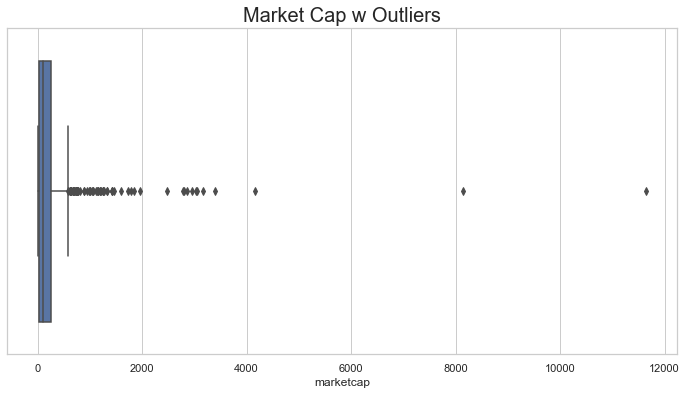

In [75]:
# boxplot for marketcap, without removing outlier
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=last_day['marketcap']).set_title('Market Cap w Outliers', fontsize = 20)

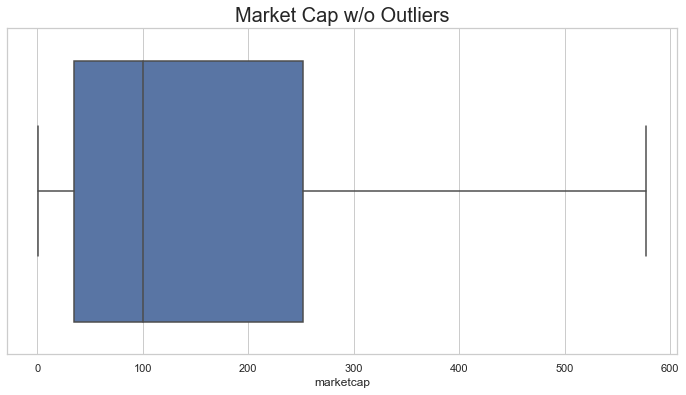

In [76]:
#after removing outliers
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=last_day['marketcap'], showfliers=False).set_title('Market Cap w/o Outliers', fontsize = 20)

In [77]:
#create a new varaible called multiples that takes into account the price multiples of the stocks on the last day
multiples = last_day.drop(columns=['marketcap','sales','ev'])

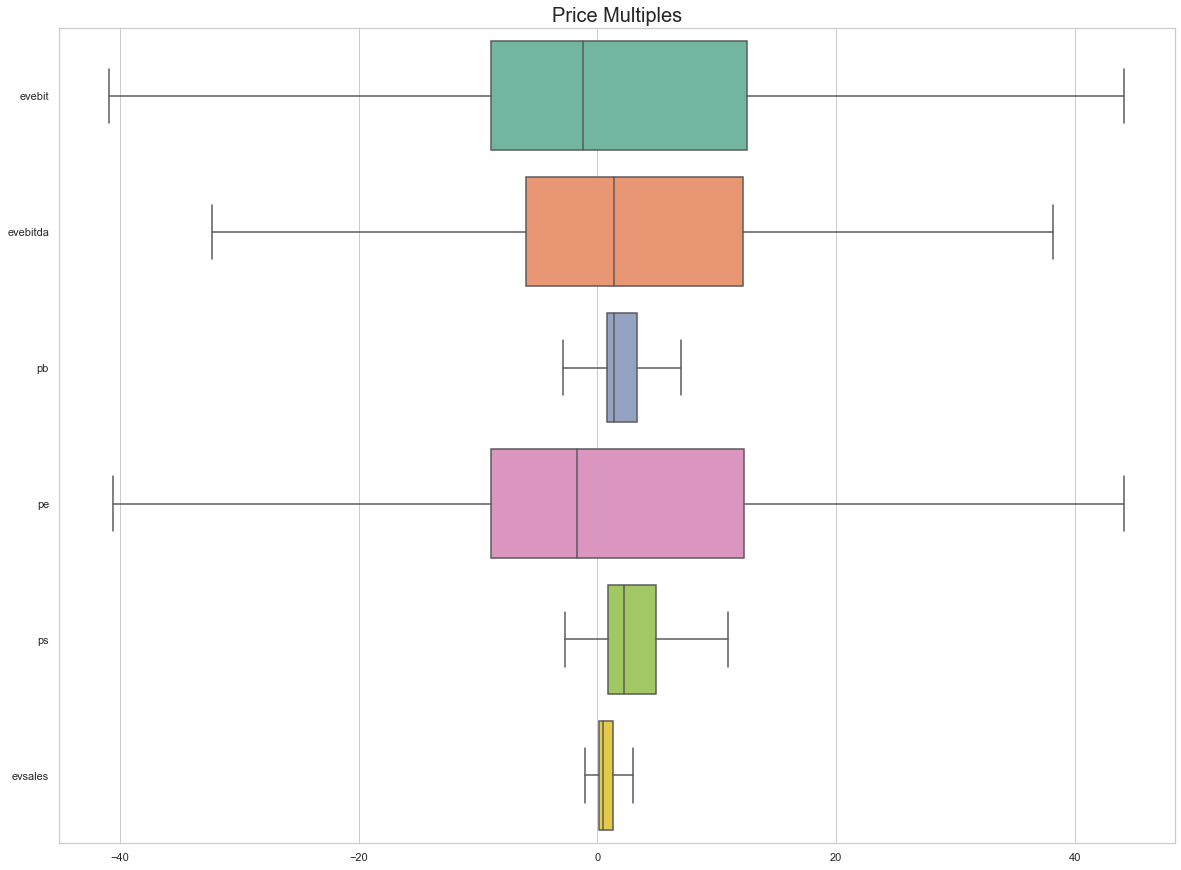

In [78]:
# plot the whole dataframe
ax = sns.boxplot(data=multiples, orient="h", palette="Set2", showfliers = False).set_title('Price Multiples', fontsize = 20)

# ScatterPlots

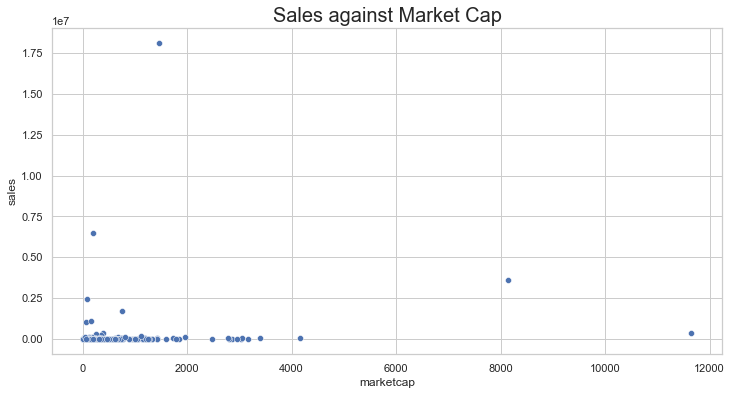

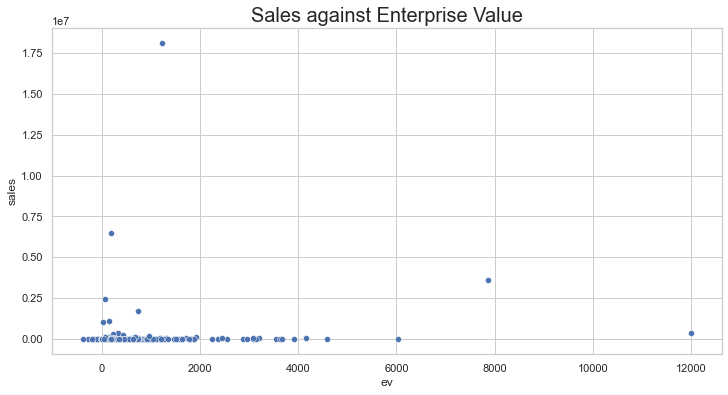

In [79]:
#scatter plot of sale against market cap
plt.figure(figsize=(12,6))
sns.scatterplot(data=last_day, x="marketcap", y="sales").set_title('Sales against Market Cap', fontsize = 20)
plt.show()

#scatter plot of sale against EV
plt.figure(figsize=(12,6))
sns.scatterplot(data=last_day, x="ev", y="sales").set_title('Sales against Enterprise Value', fontsize = 20)
plt.show()
